In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = [0.9, 2.7, 6.7, 10.9, 6.0, 6.3, 7.0, 8.7, 4.8, 12.5, 
     13.4, 2.0, 3.6, 14.6]
y = [0.5, 1.1, 28.6, 32.8, 15.7, 19, 32.6, 32.3, 7.3, 33.1, 
     32.9, 0.75, 3.6, 33]

In [7]:
val = pd.DataFrame({'x':x, 'y':y})
val = val.sort_values(by='x')
val

,x,y
0,0.9,0.50
11,2.0,0.75
1,2.7,1.10
12,3.6,3.60
8,4.8,7.30
4,6.0,15.70
5,6.3,19.00
2,6.7,28.60
6,7.0,32.60
7,8.7,32.30


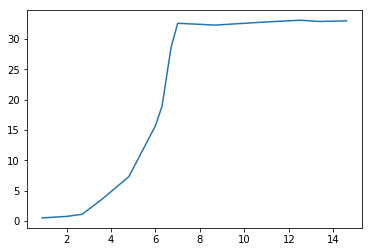

In [8]:
plt.plot(val['x'],val['y'])

In [9]:
val.describe()

,x,y
count,14.000000,14.000000
mean,7.150000,19.517857
std,4.345068,14.167618
min,0.900000,0.500000
25%,3.900000,4.525000
50%,6.500000,23.800000
75%,10.350000,32.750000
max,14.600000,33.100000


## World development indicator

In [10]:
import random

In [11]:
data = pd.read_csv('./Week5-Visualization/world-development-indicators/Indicators.csv')

In [15]:
data.shape

(5656458, 6)

In [16]:
data.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601


In [17]:
countries = data['CountryCode'].unique().tolist()
len(countries)

247

In [19]:
countryName = data['CountryName'].unique().tolist()
len(countryName)

247

In [24]:
print(type(data))
print(type(data['CountryName']))
print(type(data['CountryName'].unique()))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [25]:
indicator = data['IndicatorName'].unique().tolist()
len(indicator)

1344

In [32]:
#help(data.isna().any())

In [33]:
data.isna().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [36]:
indicator

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

## let's try hospital bed (per 1000 people)

In [38]:
sel_indicator = 'Hospital beds \(per 1,000 people'
sel_country = 'USA'

mask1 = data['IndicatorName'].str.contains(sel_indicator)
mask2 = data['CountryCode'].str.contains(sel_country)

stage = data[mask1 & mask2]

In [39]:
stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22309,United States,USA,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1960,9.2
166761,United States,USA,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1965,8.8
358062,United States,USA,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1970,7.9


In [40]:
years = stage['Year'].values
bed = stage['Value'].values

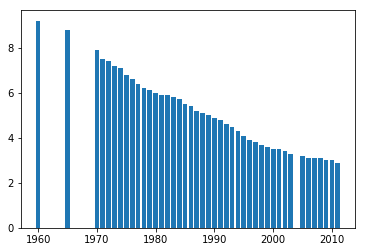

In [42]:
plt.bar(years, bed)
plt.show()

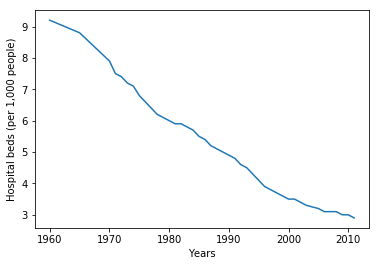

In [46]:
plt.plot(years, bed)
plt.xlabel('Years')
plt.ylabel(stage.IndicatorName.iloc[0])
plt.show()

In [49]:
print(len(stage['Value']))
sel_data = stage['Value'].values

43


In [51]:
# now compare all countries of num of beds in 2011

In [53]:
sel_indicator = 'Hospital beds \(per 1,000 people'
sel_year = 2011

mask1 = data['IndicatorName'].str.contains(sel_indicator)
mask2 = data['Year'].isin([sel_year])

bed_2011 = data[mask1 & mask2]
bed_2011.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5027477,Central Europe and the Baltics,CEB,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,6.415478
5028058,East Asia & Pacific (all income levels),EAS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,3.548629
5028679,East Asia & Pacific (developing only),EAP,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,3.557927


In [61]:
m1 = bed_2011[['CountryCode','Value']].sort_values(by=['Value'])
m1.head(3)
m1 = m1.reset_index()
m1.head(3)

,index,CountryCode,Value
0,5104994,GIN,0.3
1,5057889,BGD,0.6
2,5104019,GTM,0.6


In [64]:
m1.loc[m1.CountryCode=='USA']
#len(m1)

,index,CountryCode,Value
49,5194965,USA,2.9


(array([34., 31., 21., 17.,  5.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.3  ,  1.916,  3.532,  5.148,  6.764,  8.38 ,  9.996, 11.612,
        13.228, 14.844, 16.46 ]),
 <a list of 10 Patch objects>)

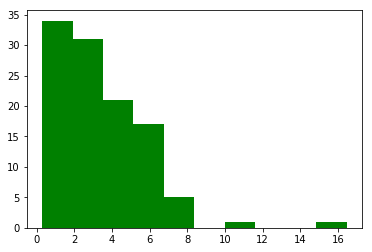

In [65]:
plt.hist(bed_2011['Value'],10,normed=False, facecolor='green')

In [67]:
m2 = bed_2011.sort_values(by='Value')
m2.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5104994,Guinea,GIN,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,0.3
5057889,Bangladesh,BGD,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,0.6
5104019,Guatemala,GTM,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,0.6


In [69]:
m2[-5:]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5109789,Hungary,HUN,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,7.20
5054897,Austria,AUT,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,7.60
5100618,Germany,DEU,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,8.20
5059284,Belarus,BLR,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,11.30
5141781,Monaco,MCO,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2011,16.46


# Folium

In [72]:
import folium

In [70]:
country_geo = 'Week5-Visualization/geo/world-countries.json'

In [71]:
plot_data = bed_2011[['CountryCode','Value']]
plot_data.head(3)

,CountryCode,Value
5027477,CEB,6.415478
5028058,EAS,3.548629
5028679,EAP,3.557927


In [73]:
map = folium.Map(location=[100,0], zoom_start=1.5)

In [74]:
map.choropleth(geo_data=country_geo, data=plot_data,
              columns=['CountryCode','Value'],
              key_on = 'feature.id',
              fill_color='YlGnBu',fill_capacity=0.7, line_oapacity=0.2,
              legend_name=bed_2011['IndicatorName'].iloc[0])

/anaconda2/envs/py35/lib/python3.5/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [75]:
map.save('plot_data.html')

In [77]:
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=900 height=700></iframe>')

In [83]:
countryName

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [86]:
bed_2011.CountryName

5027477                   Central Europe and the Baltics
5028058          East Asia & Pacific (all income levels)
5028679            East Asia & Pacific (developing only)
5029415                                        Euro area
5030003        Europe & Central Asia (all income levels)
5031503                                   European Union
5034318                                High income: OECD
5034941    Latin America & Caribbean (all income levels)
5035653      Latin America & Caribbean (developing only)
5040754                                    Middle income
5041490                                    North America
5042031                                     OECD members
5044152                                       South Asia
5046355                              Upper middle income
5048676                                          Albania
5051480                              Antigua and Barbuda
5052092                                        Argentina
5052920                        

In [87]:
mask1 = data['CountryName'].str.contains('Russian')
mask2 = data['IndicatorName'].str.contains('Hospital')
rus = data[mask1 & mask2]
rus.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1501980,Russian Federation,RUS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1985,12.9816
1589812,Russian Federation,RUS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1986,13.0463
1678938,Russian Federation,RUS,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1987,13.1176


In [89]:
print(rus.Year.min(), rus.Year.max())

1985 2006
